<a href="https://www.kaggle.com/code/eavprog/abscur-sharp?scriptVersionId=163978669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Рейтинг валют по абсолютным курсам и коэффициенту Шарпа 

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ПО КОЭФФИЦИЕНТУ ШАРПА ПО АБСОЛЮТНЫМ ВАЛЮТНЫМ КУРСАМ

Мы рады приветствовать вас на странице, посвященной рейтингам по коэффициенту Шарпа для абсолютных валютных курсов. Наши исследования и аналитические работы привели к созданию этой страницы, где вы найдете ценную информацию о коэффициенте Шарпа для валют на основе абсолютных валютных курсов. Вот основные особенности этой страницы:

- Рейтинги за различные временные промежутки: Мы предоставляем рейтинги по коэффициенту Шарпа для 45 валют. Вы можете выбрать интересующий вас временной промежуток: месяц, квартал, полгода, год, 2 года, 3 года или 5 лет. Таким образом, у вас есть возможность анализировать коэффициент Шарпа абсолютных курсов валют на различных временных горизонтах.

- Столбчатые диаграммы: Для каждого временного промежутка мы предоставляем столбчатые диаграммы, на которых коэффициенты Шарпа валют отсортированы по убыванию. Горизонтальная ось показывает коды валют, а вертикальная ось - значения коэффициента Шарпа.

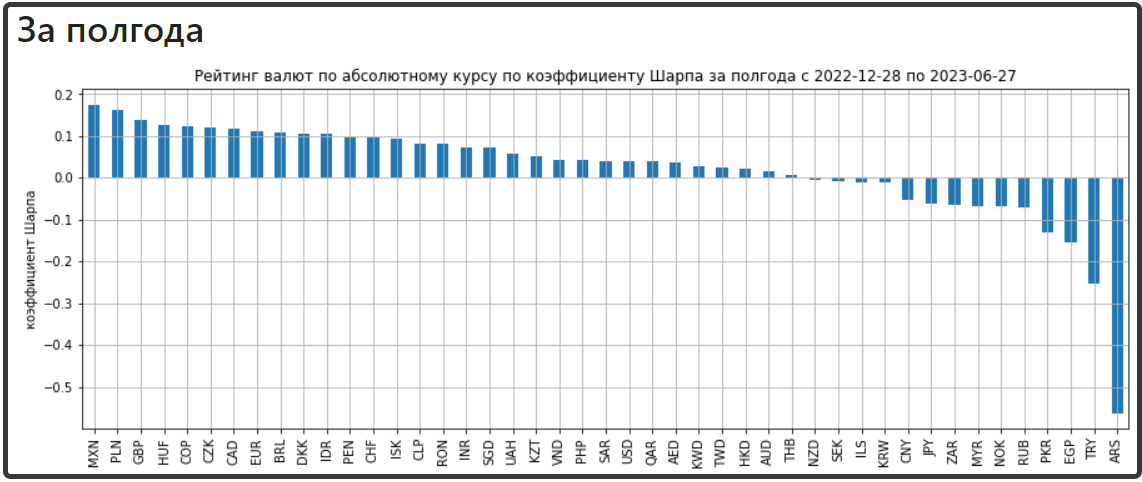

- Таблица с рейтингами: Под графиками мы предоставляем таблицу, которая содержит информацию о самых выгодных и невыгодных валютах по коэффициенту Шарпа на основе абсолютных валютных курсов. В таблице указаны коды валют, их расшифровки, значения коэффициента Шарпа. Кроме того, мы предоставляем ссылки на соответствующие страницы Википедии для получения дополнительной информации о каждой валюте, а также ссылки на страницы с графиками истории абсолютного курса этих валют.

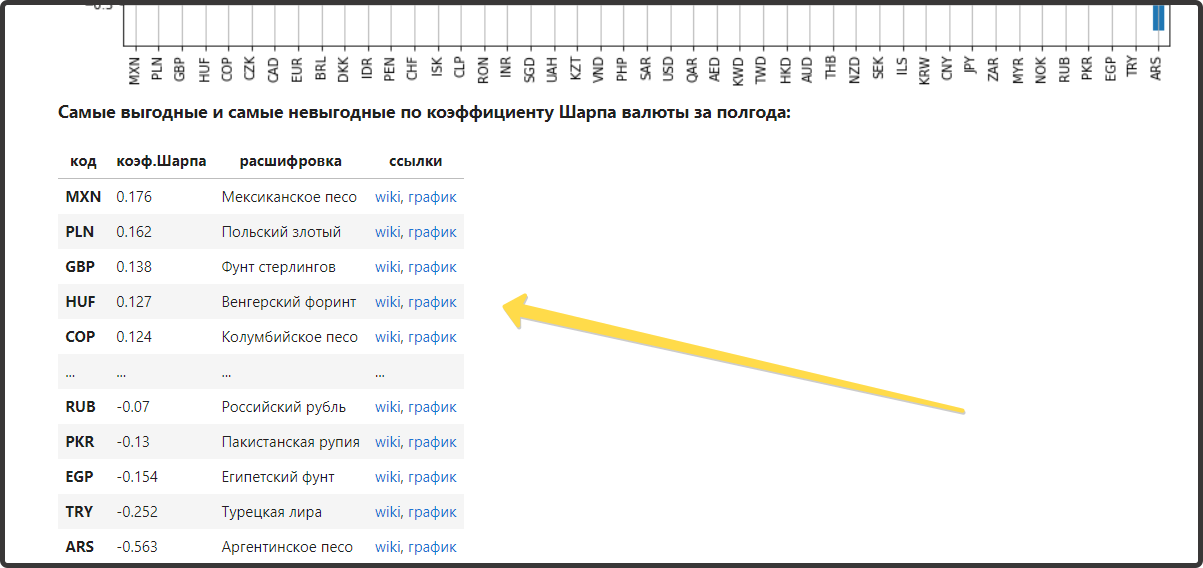

- Навигация по проекту: Для вашего удобства мы предоставляем ссылки на разделы проекта, соответствующие выбранному временному промежутку. Вы можете легко переходить к другим разделам проекта и изучать дополнительные данные о доходности валют на заданном временном горизонте.

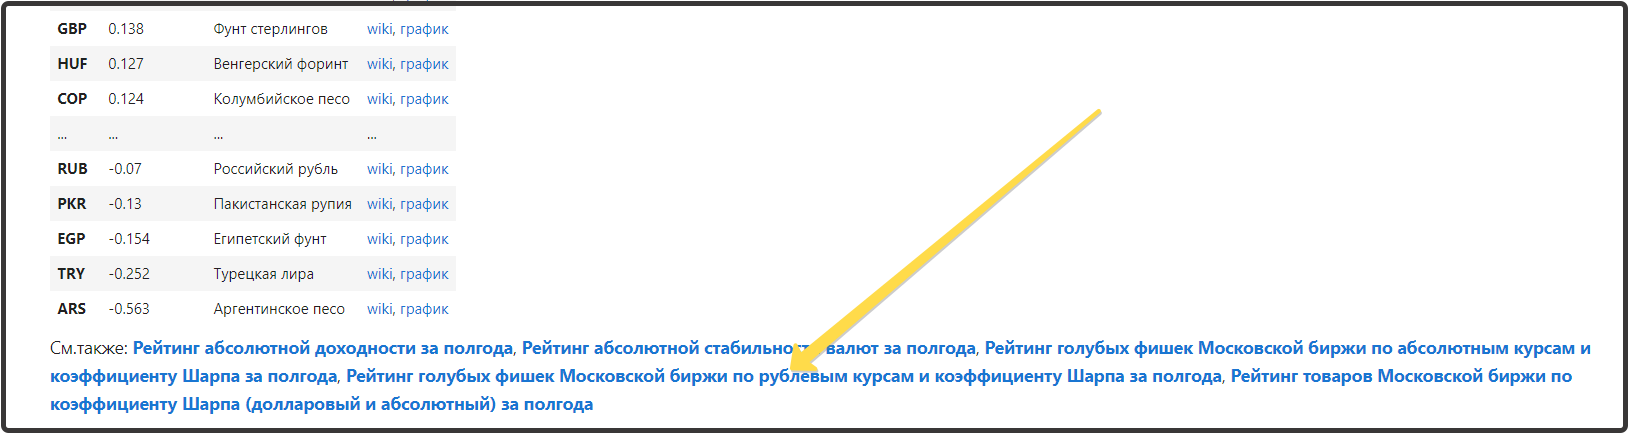

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Мы надеемся, что страница с рейтингами по коэффициенту Шарпа по абсолютным валютным курсам станет незаменимым инструментом для ваших исследований и принятия инвестиционных решений. Пользуйтесь нашей страницей с удовольствием и обратитесь к нам, если у вас возникнут вопросы или нужна дополнительная информация.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import abscur_menu
import abscur_post as ap
from IPython.display import Markdown, display

# меню проекта
abscur_menu.print_menu()

# загружаем историю абсолютных курсов
abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=True)

# загружаем расшифровки для валют
cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []
comments = []

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

for per,title_per in diap:
    text = "# За "+title_per
    display(Markdown(text))
    
    data_abs = abscur.copy()
    date_start = data_abs.asfreq(freq="D").index[-per]
    date_finish = data_abs.index[-1]
    
    res = (data_abs[abscur.index >= date_start] / data_abs[abscur.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг валют по абсолютному курсу по коэффициенту Шарпа за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    
    plt.show()
    
    comment = f"За {title_per} показали наибольший коэффициент Шарпа по абсолютному курсу такие валюты как "
    
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за " + title_per + ":**\n\n"
    text += "|код|коэф.Шарпа|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
        comment += f", {cur} ({str(np.round(res.loc[cur],3))})"
    text += "|...|...|...|...|\n"
    comment += f" и показали наименьший коэффициент Шарпа по абсолютному курсу такие валюты как "
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur],3)) + "|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
        comment += f", {cur} ({str(np.round(res.loc[cur],3))})"
    display(Markdown(text))
    comment += "."
    comment = comment.replace("как ,","как")
    
    text = "См.также: "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    comments.append(comment)
    period.append(title_per)
    
#     break
    
num = np.random.randint(img_cnt)
text = comments[num]
text += "\n---\nРейтинги по коэффициенту Шарпа для абсолютных курсов валют за все периоды в тетрадке на Kaggle по адресу - https://www.kaggle.com/code/eavprog/abscur-sharp"
img_file = str(num) + ".png"
ap.send_img_and_text(img_file,text)